In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset


In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


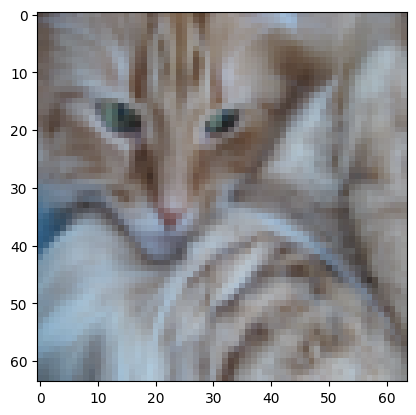

In [3]:
index = 2
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

Setting the input features into m*n vector


In [5]:
train_set_x_flatten = train_set_x_orig.reshape((m_train,num_px*num_px*3))
test_set_x_flatten = test_set_x_orig.reshape((m_test,num_px*num_px*3))
train_set_x_flatten = train_set_x_flatten.reshape(train_set_x_flatten.shape[0],-1).T
test_set_x_flatten = test_set_x_flatten.reshape(test_set_x_flatten.shape[0],-1).T

In [6]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


Standardize our dataset

In [7]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

Sigmoid function for a neuron's logistic regression

In [8]:
def sigmoid(z):
    s = 1/(1+ np.exp((-1)*z))
    return s

In [22]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))


sigmoid([0, 2]) = [0.5        0.88079708]


In [10]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    loga = np.log(A)
    logb = np.log(1-A)
    part1 = Y*loga
    part2 = (1-Y)*logb
    cost =  (-1/m)* np.sum( part1 + part2 )
    dZ = A-Y
    dw = (1/m)* (np.dot(X,dZ.T))
    db = (1/m)* (np.sum(dZ))
    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [11]:
w =  np.array([[1.], [2]])
b = 1.5

# X is using 3 examples, with 2 features each
# Each example is stacked column-wise
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405


In [12]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)

        dw = grads["dw"]
        db = grads["db"]
        w =w - learning_rate*dw
        b =b - learning_rate*db
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [13]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]


In [14]:
def predict(w, b, X):

    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A =sigmoid( np.dot(w.T,X) + b)

    for i in range(A.shape[1]):

        if A[0][i] > 0.5 :
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
    
    return Y_prediction

In [15]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


Merging all functions

In [16]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """

    
    # YOUR CODE STARTS HERE
    #initialization
    dim = X_train.shape[0]
    w = np.zeros((dim,1))
    b=0.0
    
    #grad descent
    params,grads,costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    #new parms
    w = params["w"]
    b= params["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    
    Y_prediction_train = predict(w,b,X_train)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Training the model

In [17]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
train accuracy: 96.65071770334929 %
test accuracy: 72.0 %


y = 1, you predicted that it is a "cat" picture.


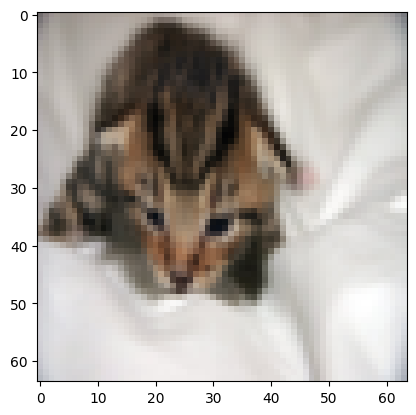

In [18]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

- Add your own image and change the name accordingly and test the model/

y = 1.0, your algorithm predicts a "cat" picture.


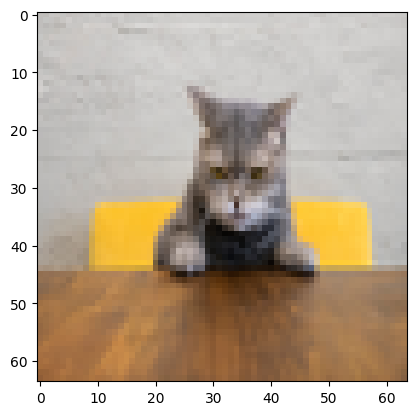

In [21]:
# change this to the name of your image file
my_image = "my-image.jpg"   

# We preprocess the image to fit your algorithm.
fname = "../images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")